In [2]:
from master import *

In [3]:
#PART 2 : q ~ exp(1/z)
fq = prefix+'H2qq-CF3.0CA3.0-sqg0100-esq1011/total.root'
X,Y = tools.pre_process(fq,f_gluon,nev_max=50000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = [np.sum([1 if zi > 0 else 0 for zi in jet]) for jet in z]
optimal = an.nk(z,-1)
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)

Finished preprocessing at 23.045056104660034
Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 3s 44us/step - loss: 0.6886 - acc: 0.5887 - val_loss: 0.6516 - val_acc: 0.6196
Epoch 2/3
70000/70000 [==============================] - 1s 17us/step - loss: 0.6536 - acc: 0.6237 - val_loss: 0.6534 - val_acc: 0.6215
Epoch 3/3
70000/70000 [==============================] - 1s 17us/step - loss: 0.6509 - acc: 0.6251 - val_loss: 0.6456 - val_acc: 0.6263
Finished training at 6.8401219844818115

PFN AUC: 0.6764552847257148

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 2s 30us/step - loss: 0.7053 - acc: 0.5199 - val_loss: 0.6881 - val_acc: 0.5364
Epoch 2/3
70000/70000 [==============================] - 1s 17us/step - loss: 0.6883 - acc: 0.5451 - val_loss: 0.6856 - val_acc: 0.5520
Epoch 3/3
70000/70000 [==============================] - 1s 17us/step - los

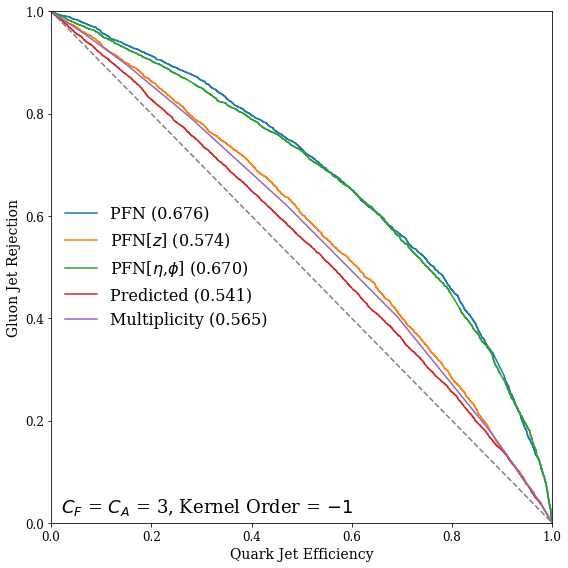

In [4]:
optimal = an.nk(z,-1) + an.nk(z,1) + an.nk(z,2)
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)